In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
employ_data = pd.read_csv('UNRATE.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
employ_data['unemployment_rate'] = pd.to_numeric(employ_data.UNRATE, errors='coerce')

# Remove NA's
employ_data.dropna(inplace=True)

In [3]:
employ_data.head()

,DATE,UNRATE,unemployment_rate
0,1948-01-01,3.4,3.4
1,1948-02-01,3.8,3.8
2,1948-03-01,4.0,4.0
3,1948-04-01,3.9,3.9
4,1948-05-01,3.5,3.5


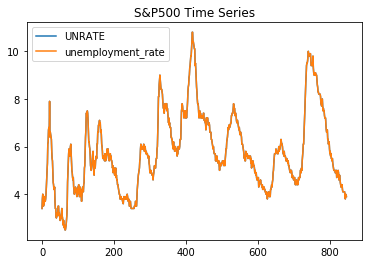

In [4]:
employ_data.plot()
plt.title('S&P500 Time Series')
plt.show()

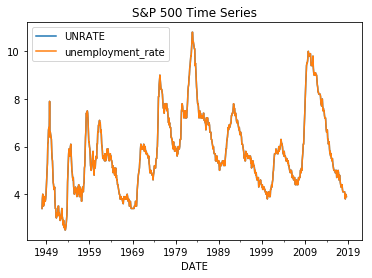

In [5]:
employ_data.index = pd.to_datetime(employ_data.DATE)
employ_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

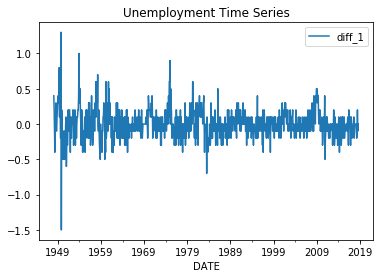

In [6]:
employ_data['diff_1'] = employ_data.unemployment_rate - employ_data.unemployment_rate.shift()
employ_data.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

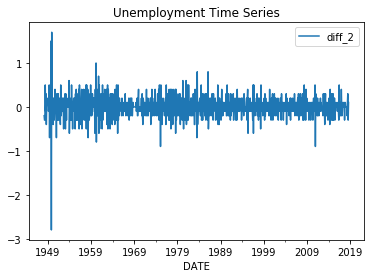

In [7]:
employ_data['diff_2'] = employ_data.diff_1 - employ_data.diff_1.shift()
employ_data.plot(y='diff_2')
plt.title('Unemployment Time Series')
plt.show()

Text(0.5,1,'Unemployment PACF')

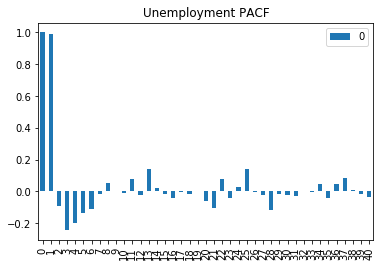

In [8]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(employ_data.unemployment_rate))
x_acf.plot(kind='bar')
plt.title("Unemployment PACF")

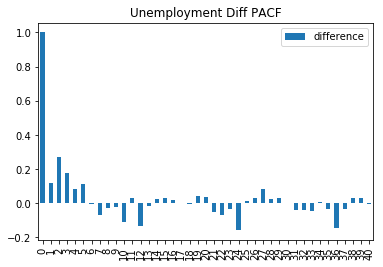

In [9]:
x_acf = pd.DataFrame(pacf(employ_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment Diff PACF")
plt.legend(['difference'])